<a href="https://colab.research.google.com/github/adjha/Forest-parallex-website-/blob/main/Online_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd

# 2. Loading Dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fraud_project/onlinefraud.csv')

## Previewing the Dataset

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Checking the Dataset Dimension

In [ ]:
df.shape

(6362620, 11)

## Dataset Overview


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


## Statistical Summary of the Dataset

In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


## Checking for Missing Values

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


## Checking Value Distribution in Key Columns

In [ ]:
df.nameOrig.value_counts()

,count
nameOrig,
C1530544995,3
C545315117,3
C724452879,3
C1784010646,3
C1677795071,3
...,...
C1567523029,1
C644777639,1
C1256645416,1


In [ ]:
df.nameDest.value_counts()

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


In [ ]:
df.type.value_counts()


,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


In [ ]:
df.isFlaggedFraud.value_counts()


,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
df.isFraud.value_counts()

,count
isFraud,
0,6354407
1,8213


# 3. Comprehensive Exploratory Data Analysis and Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def showPlot(feature, bins=10, color='grey', figsize=(12, 6)):


    # Set the plot size and style
    plt.figure(figsize=figsize)

    # Plot the histogram
    df[feature].plot(kind='hist', bins=bins, facecolor=color, edgecolor='black', alpha=0.7, label='Data Distribution')

    # Title and axis labels for better context
    plt.title(f'Distribution of {feature}', fontsize=16)
    plt.xlabel(f'{feature} Values', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)

    # Add a legend to the plot
    plt.legend(loc='upper right')

    # Calculate mean and median
    mean_value = df[feature].mean()
    median_value = df[feature].median()

    # Add lines for mean and median for better insight
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean_value:.2f}')
    plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=3, label=f'Median: {median_value:.2f}')

    # Set the limits for x-axis to ensure the lines are visible
    plt.xlim(df[feature].min() - 0.1*(df[feature].max() - df[feature].min()),
             df[feature].max() + 0.1*(df[feature].max() - df[feature].min()))

    # Show grid for better readability
    plt.grid(True)

    # Show the plot
    plt.show()

### Visualizing the 'step' Feature

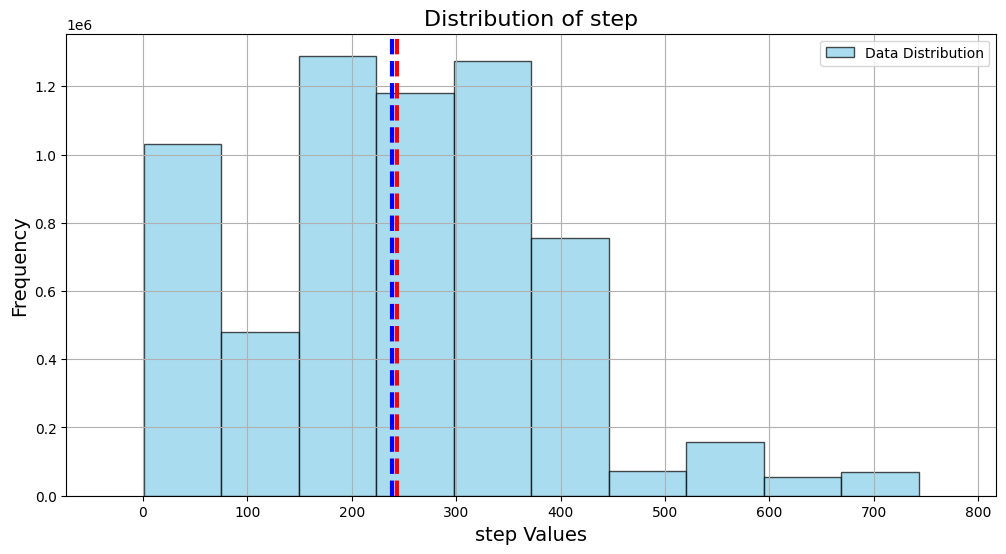

In [ ]:
showPlot('step', bins=10, color='skyblue')

### Visualizing the 'amount' Feature

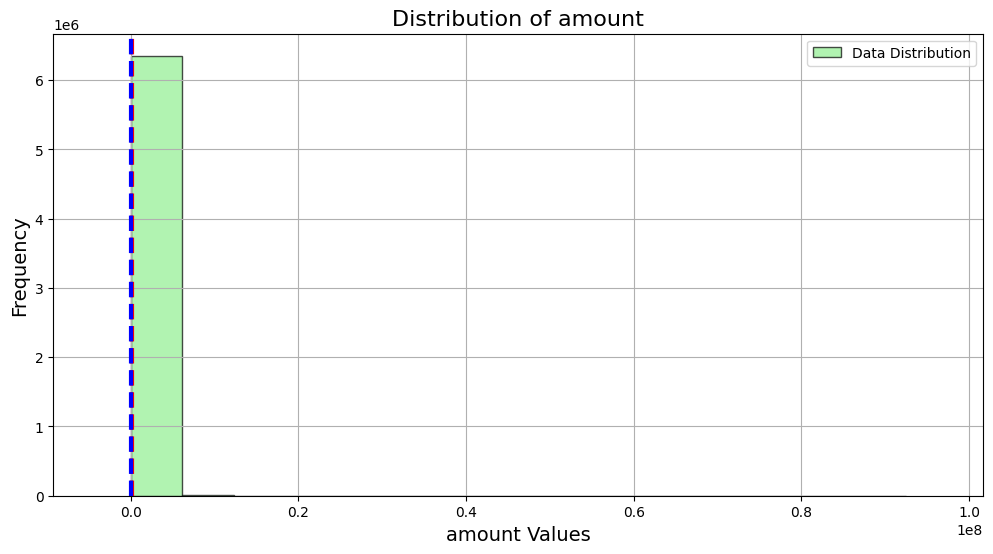

In [ ]:
showPlot('amount', bins=15, color='lightgreen')

### Visualizing the 'oldbalanceOrg' Feature

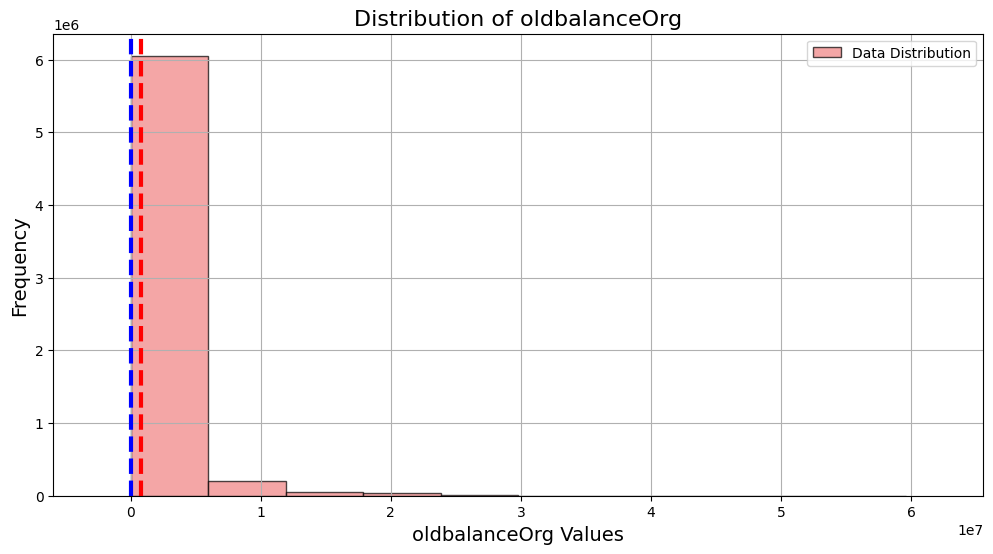

In [ ]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

## Visualizing the 'newbalanceOrig' Feature

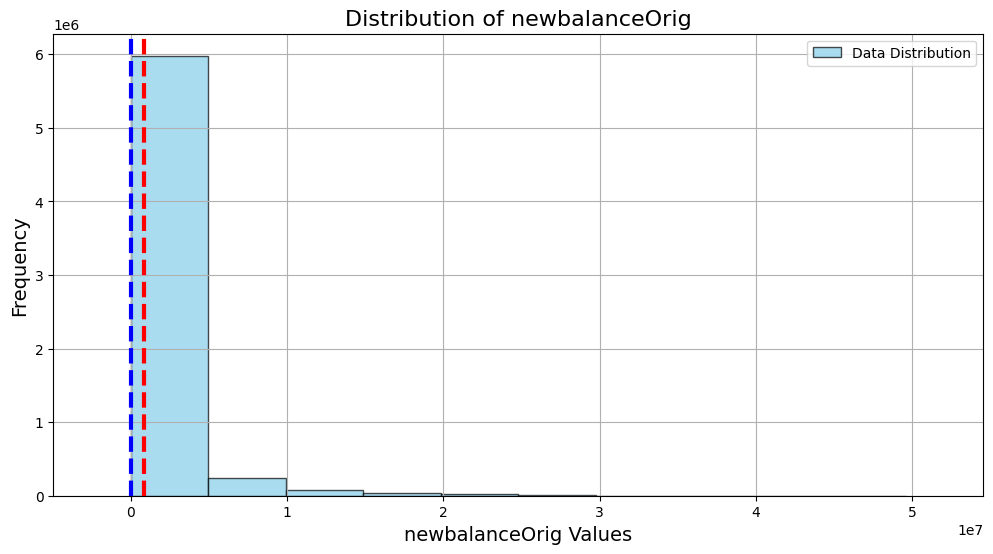

In [ ]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

### Visualizing the 'oldbalanceDest' Feature

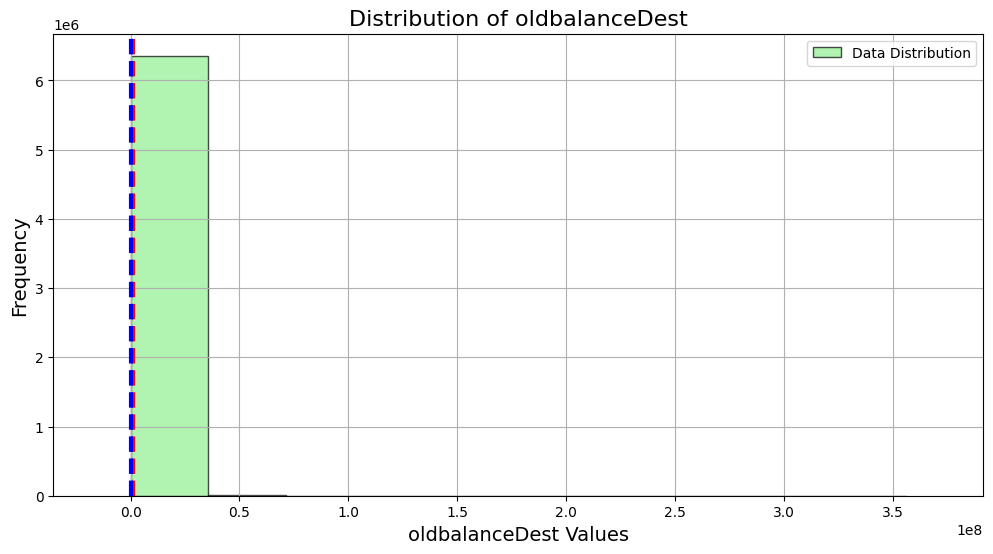

In [ ]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')

## Visualizing the 'newbalanceDest' Feature

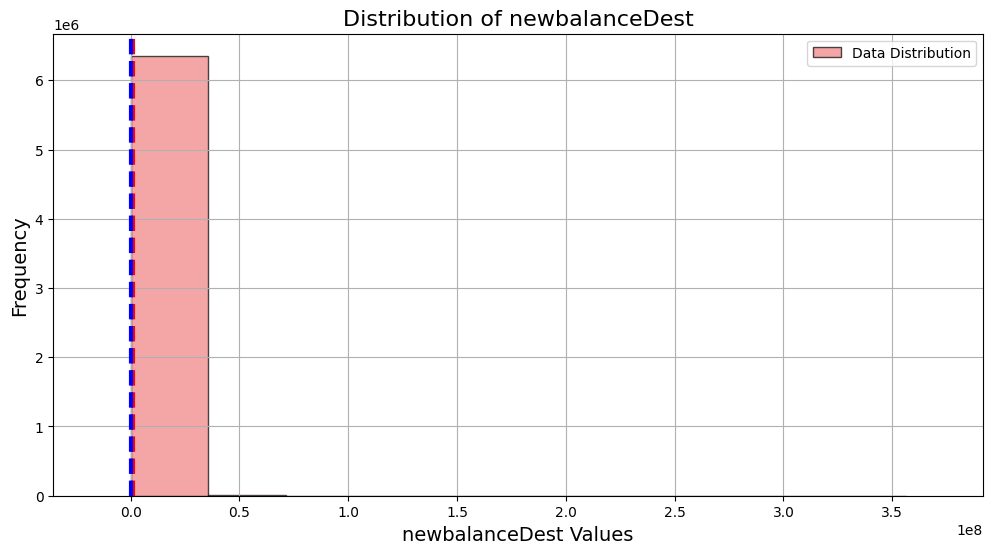

In [ ]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

## Handling Outliers with Quantile-Based Flooring and Capping

In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))
    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




In [ ]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] > upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8008306944275442


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




### Visualizing the Data After Removing Outliers

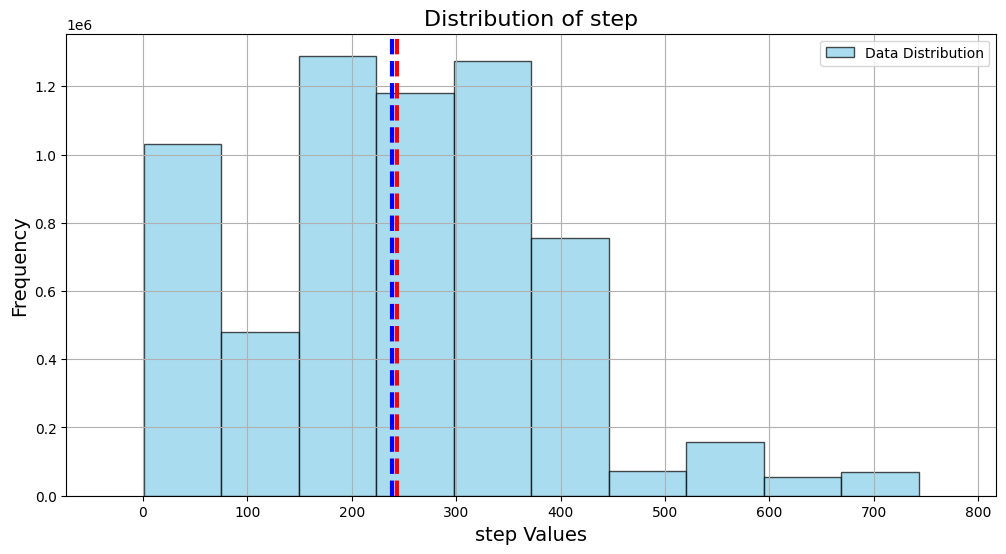

In [ ]:
showPlot('step', bins=10, color='skyblue')

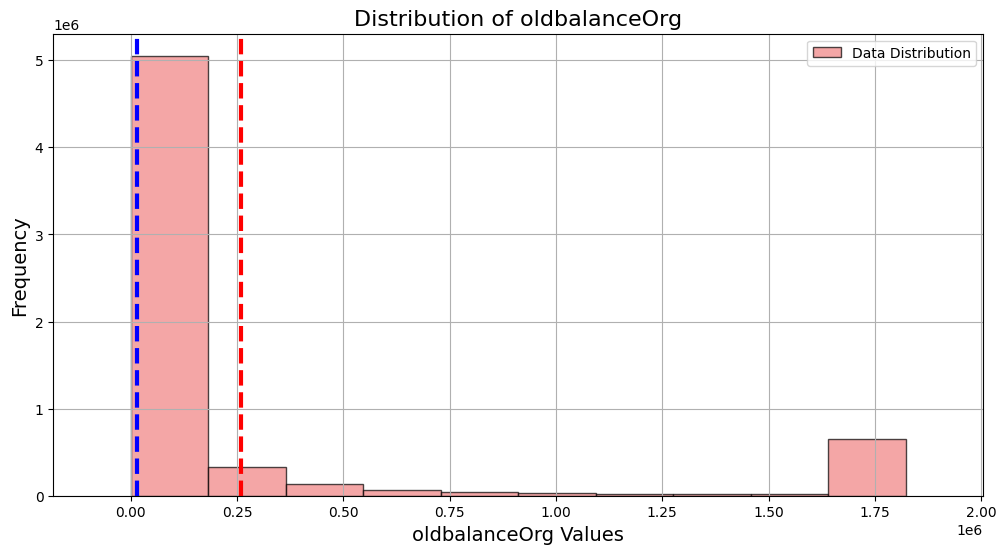

In [ ]:
showPlot('oldbalanceOrg', bins=10, color='lightcoral')

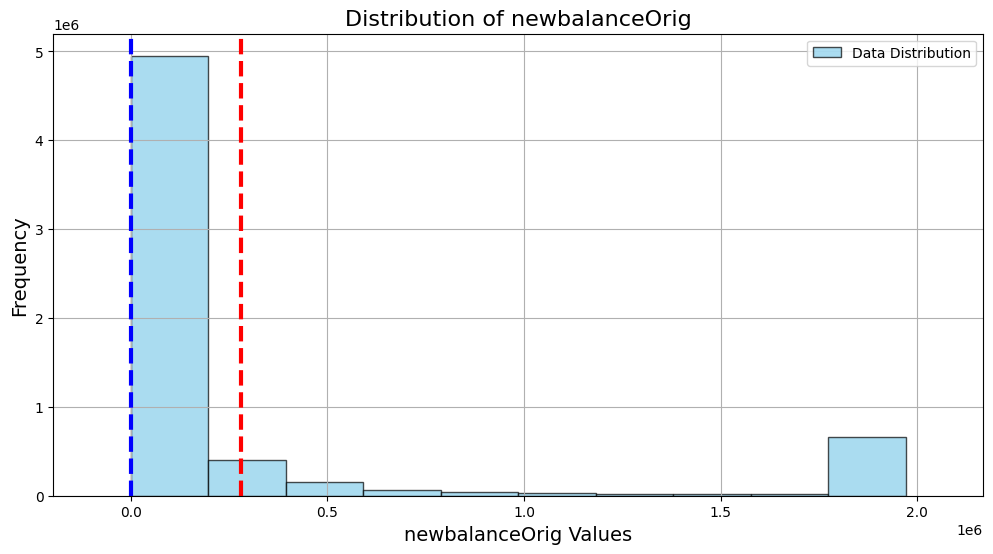

In [ ]:
showPlot('newbalanceOrig', bins=10, color='skyblue')

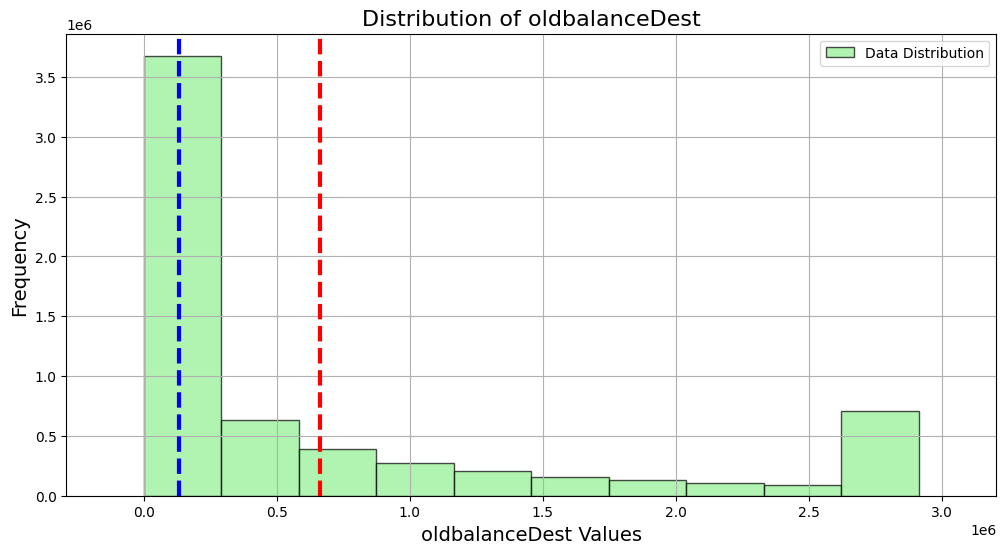

In [ ]:
showPlot('oldbalanceDest', bins=10, color='lightgreen')


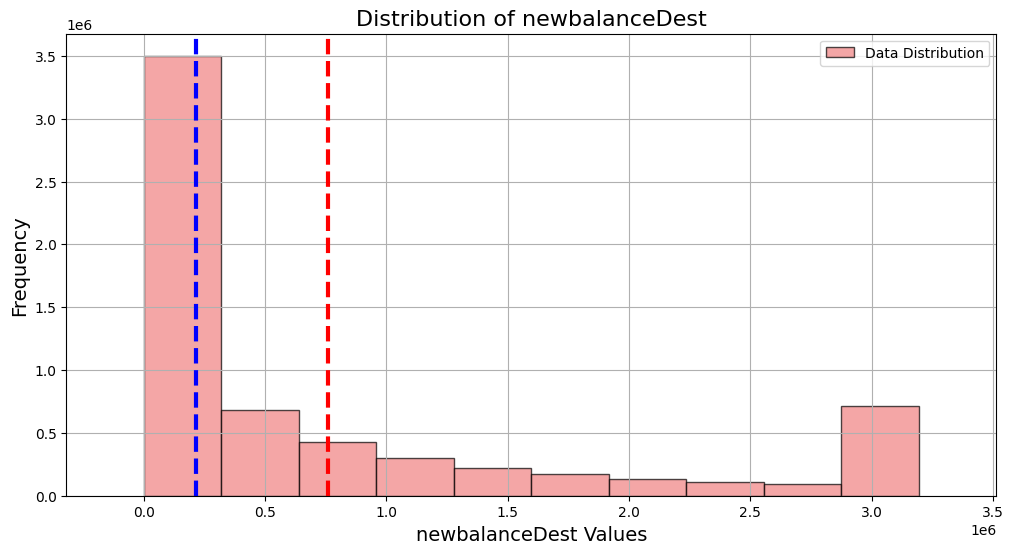

In [ ]:
showPlot('newbalanceDest', bins=10, color='lightcoral')

## Key Columns for Fraud Detection Analysis

In [ ]:
df.type

,type
0,PAYMENT
1,PAYMENT
2,TRANSFER
3,CASH_OUT
4,PAYMENT
...,...
6362615,CASH_OUT
6362616,TRANSFER
6362617,CASH_OUT
6362618,TRANSFER


In [ ]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

## Transaction Type Distribution: Payment Transactions

In [ ]:
payment = df.type.value_counts()
payment

,count
type,
CASH_OUT,2237500
PAYMENT,2151495
CASH_IN,1399284
TRANSFER,532909
DEBIT,41432


<Axes: ylabel='type'>

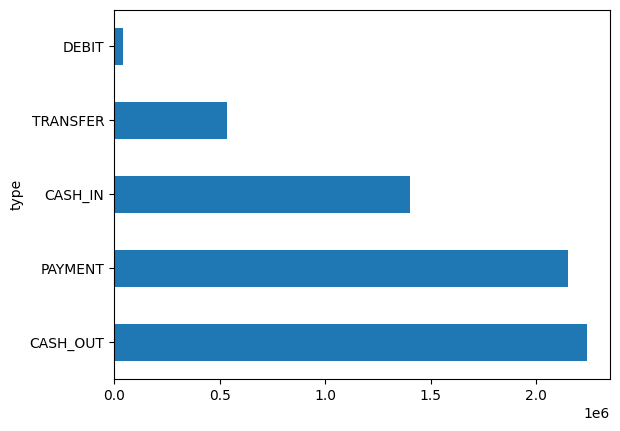

In [ ]:
payment.plot(kind='barh')

<Axes: xlabel='type', ylabel='count'>

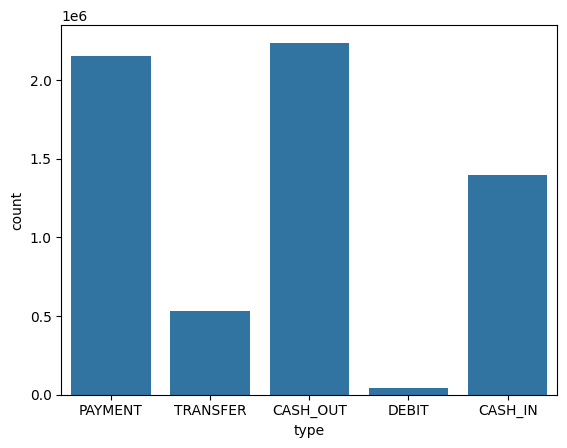

In [ ]:
sns.countplot(x='type', data=df)

## Analyzing the Relationship Between Transaction Type and Fraud

In [ ]:
CrosstabResult = pd.crosstab(index = df.type, columns = df.isFraud)
CrosstabResult

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


In [ ]:
CrosstabResult[1]

,1
type,
CASH_IN,0
CASH_OUT,4116
DEBIT,0
PAYMENT,0
TRANSFER,4097


## Visualizing the Relationship Between Transaction Type and Fraud with a Grouped Bar Chart

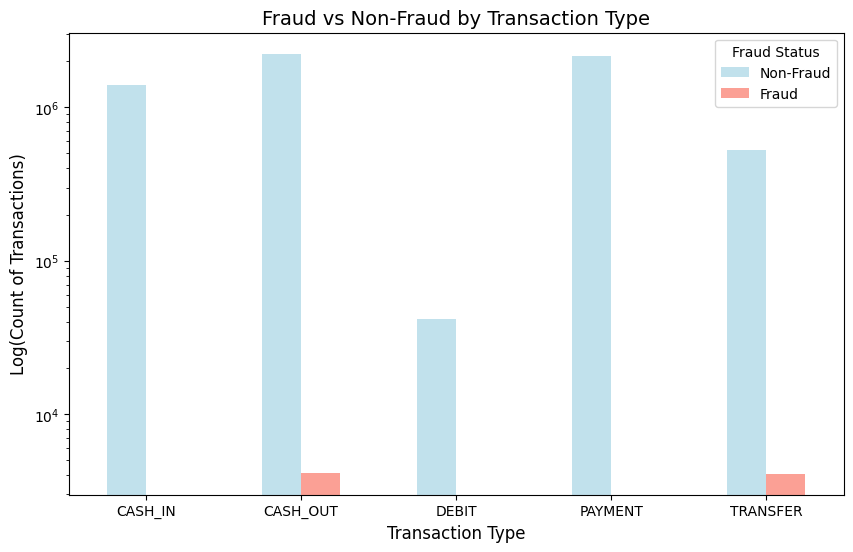

In [ ]:
# Adjusting the plot for better visibility
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Use logarithmic scale for better visibility of small values
plt.yscale('log')

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Log(Count of Transactions)', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Adding a legend
plt.legend(title='Fraud Status', labels=['Non-Fraud', 'Fraud'])

# Show the plot
plt.show()

## Maximizing the Visibility of Fraudulent Transactions in a Grouped Bar Chart

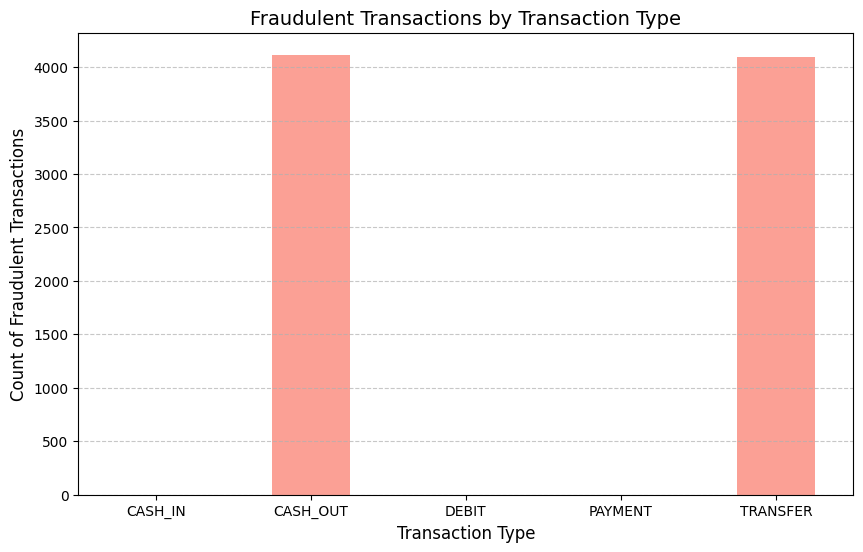

In [ ]:
# Plotting the fraud data only, maximizing visibility
CrosstabResult[1].plot.bar(figsize=(10, 6), rot=0, color=['salmon'], alpha=0.75)

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Fraudulent Transactions', fontsize=12)
plt.title('Fraudulent Transactions by Transaction Type', fontsize=14)

# Adding gridlines for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Improving the View of Fraudulent Transactions with a Customized Y-Axis Limit

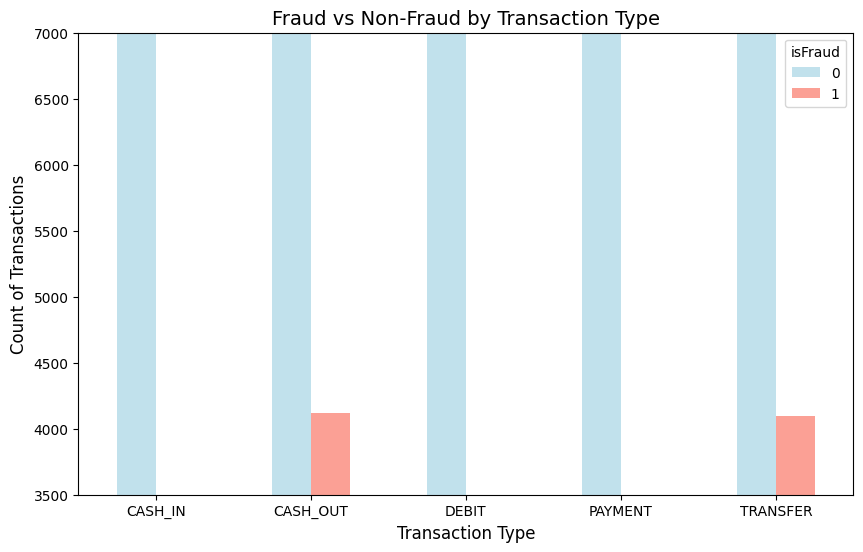

In [ ]:
# Plotting the grouped bar chart with customized y-axis limit to focus on fraudulent transactions
CrosstabResult.plot.bar(figsize=(10, 6), rot=0, color=['lightblue', 'salmon'], alpha=0.75)

# Set the y-axis limit to zoom in on the range of interest (fraudulent transactions)
plt.ylim([3500, 7000])

# Adding labels and title
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count of Transactions', fontsize=12)
plt.title('Fraud vs Non-Fraud by Transaction Type', fontsize=14)

# Show the plot
plt.show()

## Analyzing the Percentage of Fraud in Cashout and Transfer Transaction Types

In [ ]:
# Calculating the fraud percentage for 'cashout' and 'transfer' transaction types
cashout_fraud = CrosstabResult.loc['CASH_OUT', 1]  # Fraudulent cashout transactions
cashout_total = CrosstabResult.loc['CASH_OUT'].sum()  # Total cashout transactions
cashout_fraud_percentage = (cashout_fraud / cashout_total) * 100

transfer_fraud = CrosstabResult.loc['TRANSFER', 1]  # Fraudulent transfer transactions
transfer_total = CrosstabResult.loc['TRANSFER'].sum()  # Total transfer transactions
transfer_fraud_percentage = (transfer_fraud / transfer_total) * 100

# Displaying the fraud percentages
print(f"Fraud Percentage in Cashout Transactions: {cashout_fraud_percentage:.2f}%")
print(f"Fraud Percentage in Transfer Transactions: {transfer_fraud_percentage:.2f}%")

Fraud Percentage in Cashout Transactions: 0.18%
Fraud Percentage in Transfer Transactions: 0.77%


## Calculating the Fraud Percentage for Cashout and Transfer Transaction Types

The result of these calculations is as follows:

Cashout Fraud Percentage: 0.184% — This indicates that only a very
small fraction of cashout transactions are fraudulent.
Transfer Fraud Percentage: 0.769% — Similarly, this suggests that the percentage of fraudulent transactions within the transfer type is also quite low.
Both fraud percentages are relatively low, which could indicate that while fraud exists, it is not prevalent in these transaction types.

In [ ]:

cashout=2233384+4116
cashout_fraud= 4116/(cashout) * 100
cashout_fraud


0.18395530726256984

In [ ]:

transfer= 528812+4097
transfer_fraud = 4097/(transfer) * 100
transfer_fraud


0.7687991758442811

## Analyzing the Distribution of Transaction Amounts and its Relationship with Fraud

In [ ]:

df.amount

,amount
0,9839.640
1,1864.280
2,181.000
3,181.000
4,11668.140
...,...
6362615,339682.130
6362616,365423.309
6362617,365423.309
6362618,365423.309


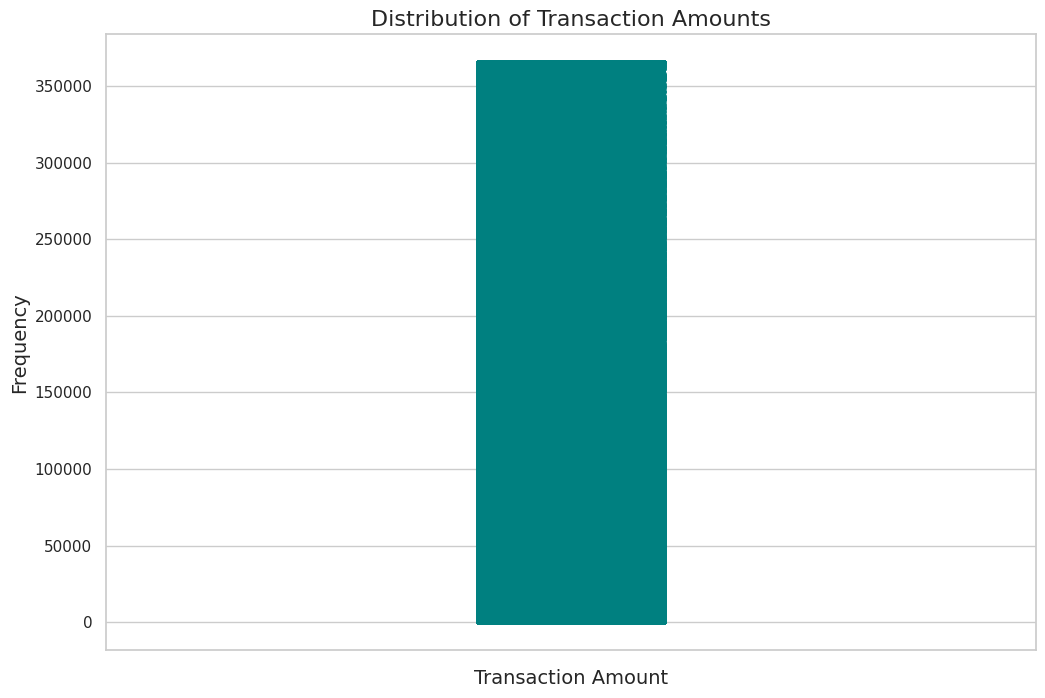

In [ ]:

# Improved Strip Plot for Amount with customization
plt.figure(figsize=(12, 8))

# Set the style and color palette
sns.set(style="whitegrid")
sns.stripplot(y=df.amount, color='teal', jitter=True, size=3, edgecolor='black')

# Adding labels and title
plt.xlabel('Transaction Amount', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Distribution of Transaction Amounts', fontsize=16)

# Displaying the plot
plt.show()



In [ ]:

print('Minimum: ',df.amount.min())
print('Maximum: ',df.amount.max())

Minimum:  0.0
Maximum:  365423.30900000007


/tmp/ipython-input-3091742679.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)


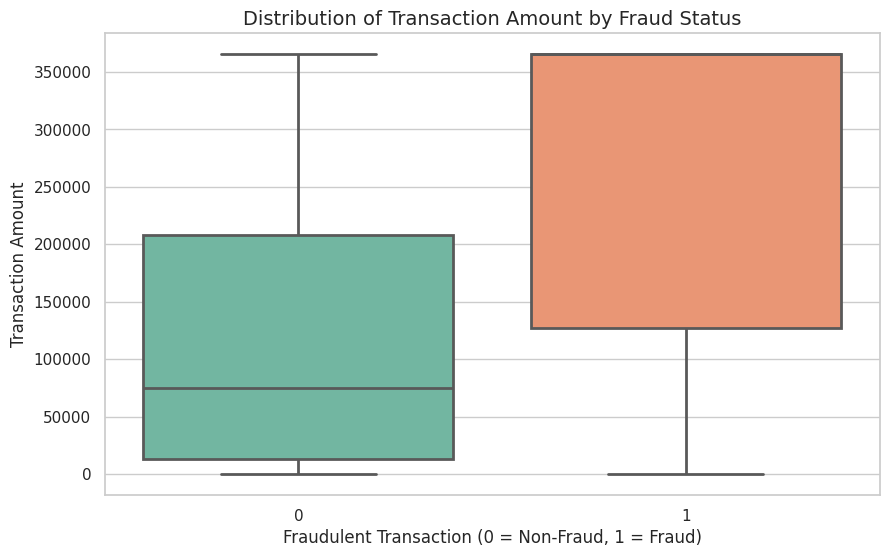

In [ ]:

# Improved Boxplot for 'Amount' by 'isFraud' column
plt.figure(figsize=(10, 6))

# Set the style and color palette
sns.set(style="whitegrid")

# Create the boxplot
sns.boxplot(x='isFraud', y='amount', data=df, palette='Set2', showfliers=False, linewidth=2)

# Adding labels and title
plt.xlabel('Fraudulent Transaction (0 = Non-Fraud, 1 = Fraud)', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Distribution of Transaction Amount by Fraud Status', fontsize=14)

# Displaying the plot
plt.show()

Insights:
The range of amounts is quite large, with values spanning from around 4500 to 360,000.
There seems to be a higher concentration of fraud in transactions with amounts ranging from 1.3 lakh to 3.6 lakh, which could be an important factor for further fraud detection analysis.
The boxplot visualization helps to identify how fraudulent transactions tend to involve higher amounts compared to non-fraudulent ones bold text




## Analysis of Fraudulent Transactions

We begin by calculating the total number of transactions and the number of fraudulent transactions in the dataset.

1. Total Transactions: The dataset contains a total of 6,362,620 transactions.

2. Fraudulent Transactions: Out of these total transactions, 8,213 transactions were flagged as fraudulent (isFraud = 1).

3. Fraud Percentage: The percentage of fraudulent transactions in the dataset is approximately 0.13%, which is still a very low value, indicating that fraudulent transactions are relatively rare in this dataset.

4. Fraudulent Transaction Amount: Next, we analyze the transaction amounts for fraudulent transactions. The fraudulent transactions are sorted by amount in descending order, showing the highest value transactions first.

5. Fraudulent Transaction Amount Distribution: A histogram of the fraudulent transaction amounts reveals that the values are spread across different ranges, with a concentration in the higher end of the spectrum. This distribution can help to identify patterns in fraudulent transactions, such as common amounts that fraudsters tend to target.

In [ ]:

total_transactions = df.shape[0]
fraud_transaction = df[df.isFraud==1].shape[0]
fraud_percent= fraud_transaction/total_transactions * 100
fraud_percent

0.12908204481801522

In [ ]:

print('Total transactions: ',total_transactions)
print('Total fraud transactions happened: ',fraud_transaction)
print("Total fraud transaction percent: ",round(fraud_percent,2))

Total transactions:  6362620
Total fraud transactions happened:  8213
Total fraud transaction percent:  0.13


In [ ]:

fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362619,743,CASH_OUT,365423.309,C1280323807,850002.520,0.0,C873221189,2914266.669,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.0,C2080388513,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.0,C1365125890,68488.840,3194869.671,1,0
6362601,742,CASH_OUT,365423.309,C1614818636,652993.910,0.0,C362803701,0.000,652993.910,1,0
6362600,742,TRANSFER,365423.309,C40604503,652993.910,0.0,C1166857907,0.000,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362463,730,CASH_OUT,0.000,C2088151490,0.000,0.0,C1156763710,0.000,0.000,1,0
5563714,387,CASH_OUT,0.000,C1294472700,0.000,0.0,C1325541393,2914266.669,3194869.671,1,0
3760289,279,CASH_OUT,0.000,C539112012,0.000,0.0,C1106468520,538547.630,538547.630,1,0
6266414,617,CASH_OUT,0.000,C1971175979,0.000,0.0,C1352345416,0.000,0.000,1,0


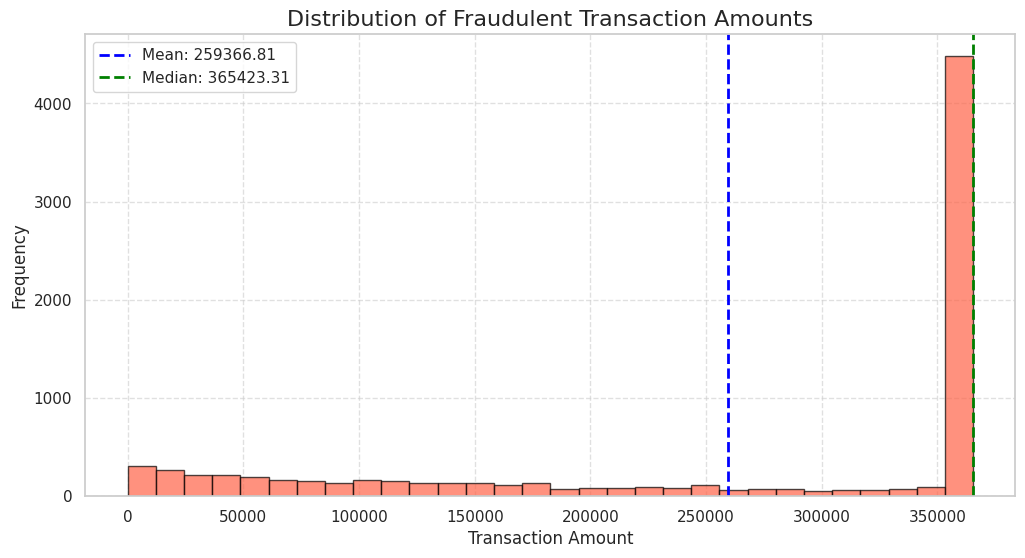

In [ ]:

# Improved histogram plot
plt.figure(figsize=(12, 6))
plt.hist(fraud_amount['amount'], bins=30, color='tomato', edgecolor='black', alpha=0.7)

# Add title and labels
plt.title('Distribution of Fraudulent Transaction Amounts', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Optional: Add a vertical line for the mean and median values
mean_value = fraud_amount['amount'].mean()
median_value = fraud_amount['amount'].median()
plt.axvline(mean_value, color='blue', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')

# Show the legend
plt.legend()

# Display the plot
plt.show()

Insights:
1. The fraud rate is still very low, with only 0.13% of transactions being fraudulent.
2. Fraudulent transactions tend to occur more frequently in higher transaction value ranges.
3. The histogram of fraudulent transaction amounts provides insights into the distribution, which can be useful for improving fraud detection systems, focusing on high-value transactions where fraud is more likely to occur.

***This analysis highlights that fraudulent transactions are rare but tend to involve larger sums of money, which can inform strategies for detecting and preventing fraud in higher-value transactions.***

**Analysis of Flagged Fraud Transactions**


* The isFlaggedFraud column indicates transactions that are assumed to be fraudulent based on the detection system, but not necessarily verified. Let’s examine the distribution of values in this column.

* **Flagged Fraud Transactions:** isFlaggedFraud column contains a value of 1 for transactions that have been assumed and flagged as fraud.
 Upon inspection of the data, we find that out of the total 6,362,604 records, only 16 transactions have been flagged as fraudulent. This is an extremely low number, considering the large dataset.

* **Actual Fraud vs Flagged Fraud:** When we compare this with the actual number of fraudulent transactions (where isFraud = 1), we see that fraudulent transactions are far more frequent than the flagged transactions. This discrepancy indicates that the flagging system is highly selective, and only a very small percentage of transactions are flagged, even though actual fraud occurs much more frequently.


In [ ]:
df.isFlaggedFraud.value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


In [ ]:
flagged_fraud_records = df[(df.isFraud==1) & (df.isFlaggedFraud==1)]
flagged_fraud_records


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,365423.309,C728984460,1822508.289,1970344.793,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,365423.309,C1100582606,1343002.080,1343002.080,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,365423.309,C1035541766,536624.410,536624.410,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,365423.309,C908544136,1822508.289,1970344.793,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,365423.309,C689608084,1822508.289,1970344.793,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,365423.309,C452586515,1822508.289,1970344.793,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,365423.309,C193696150,1822508.289,1970344.793,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.220,C1684585475,353874.220,353874.220,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,365423.309,C786455622,1822508.289,1970344.793,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,365423.309,C19004745,1822508.289,1970344.793,C1806199534,0.0,0.0,1,1


**Insights:**
* The isFlaggedFraud column represents a very small number of transactions compared to actual fraud occurrences. Only 16 transactions are flagged, but there are many more fraudulent transactions.

* The flagging system is much stricter or more conservative, flagging only a tiny fraction of actual frauds.

This analysis highlights that the isFlaggedFraud column likely represents transactions that the fraud detection system assumed to be fraudulent based on certain criteria, but it might not reflect the actual incidence of fraud accurately. More comprehensive or sensitive detection systems might be required to flag fraudulent transactions more effectively.

# **Analysis of Flagged Fraud Transactions Accuracy**

In this section, we are evaluating how accurate the flagged fraud detection system is by comparing the number of fraud transactions that were flagged as fraudulent to the total number of actual fraudulent transactions.

1. **Flagged Fraud Accuracy:**We already know that 16
transactions were flagged as fraudulent in the dataset, and we have 8,213 actual fraud transactions in total.

In [ ]:

total_fraud= df[df.isFraud ==1]
total_fraud = total_fraud.shape[0]
total_fraud

8213

In [ ]:

total_isflaggedFraud= flagged_fraud_records.shape[0]
total_isflaggedFraud

16

2. **Percentage of Flagged Fraud:** To determine how effective the flagging system is, we calculate the percentage of fraud transactions that were correctly flagged. The percentage of flagged fraud can be calculated as:

The result shows that only 0.195% of the total fraud transactions were flagged.

In [ ]:

flagged_percent = total_isflaggedFraud/total_fraud * 100
print('Percentage of flagged fraud: ',round(flagged_percent,3))

Percentage of flagged fraud:  0.195


3. **Percentage of Unflagged Fraud:** Next, we calculate the percentage of fraud transactions that were not flagged. This is the difference between total fraud transactions and the flagged fraud transactions, which represents the unflagged fraud:

The result indicates that 99.805% of fraud transactions were not flagged.

In [ ]:
unflagged_percent= (total_fraud-total_isflaggedFraud)/total_fraud * 100
print('Percentage of incorrectly flagged fraud: ',round(unflagged_percent,3))

Percentage of incorrectly flagged fraud:  99.805


* The percentage of fraud flagged as fraudulent is extremely low, at 0.195%, indicating that the fraud detection system is not very effective in identifying fraud.
* The majority (99.805%) of fraud transactions were not flagged, which suggests that the fraud detection system has significant limitations in identifying fraudulent transactions.

# **Analysis of Fraudster IDs (nameDest)**

In this section, we analyze the nameDest column, which represents the recipient of a transaction. We are particularly interested in identifying the most frequent "fraudster" IDs involved in fraudulent transactions.

1. **Frequency of Fraudster IDs**: We start by checking the frequency of each unique value in the nameDest column. This gives us the count of how many transactions each recipient (fraudster) was involved in.

In [ ]:
fraudster= df.nameDest.value_counts()
fraudster

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
...,...
M367627425,1
M1902904124,1
M242332837,1


2. **Top 10 Fraudster IDs:** Since the dataset contains a large number of unique values for nameDest, we'll focus on the top 10 fraudster IDs to identify which recipients are most frequently associated with fraudulent transactions.

The top 10 fraudster IDs are obtained by selecting the first 10 values from the sorted frequency distribution of nameDest.

In [ ]:
fraudster[:10]

,count
nameDest,
C1286084959,113
C985934102,109
C665576141,105
C2083562754,102
C248609774,101
C1590550415,101
C1789550256,99
C451111351,99
C1360767589,98


3. **Visualization:** To visualize the most frequent fraudster IDs, we plot a horizontal bar chart to display the number of occurrences for each fraudster. This gives a clear view of the fraudster distribution based on the number of transactions they are involved in.

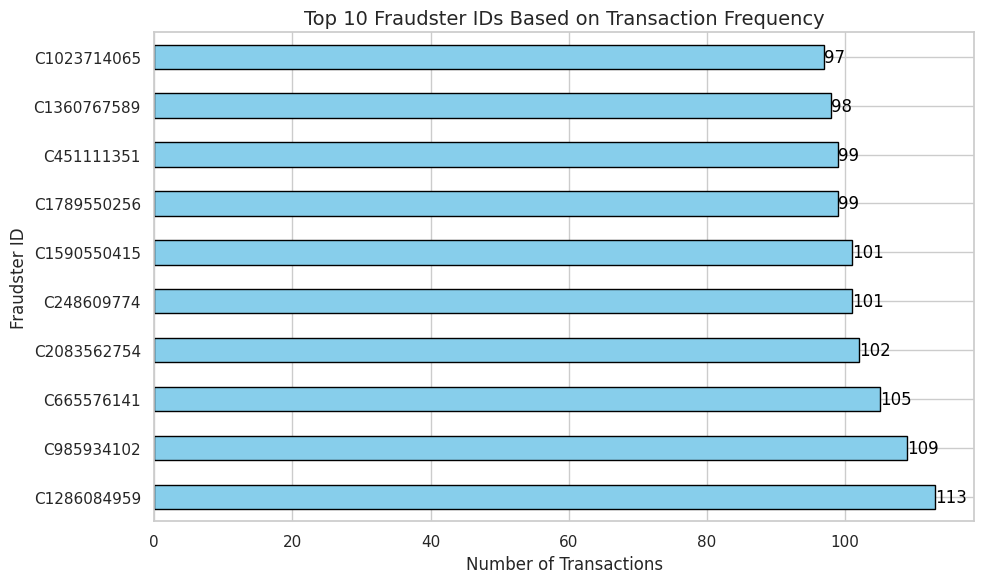

In [ ]:

import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(10, 6))

# Plot horizontal bar chart with custom color
fraudster[:10].plot(kind='barh', color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Top 10 Fraudster IDs Based on Transaction Frequency', fontsize=14)
plt.xlabel('Number of Transactions', fontsize=12)
plt.ylabel('Fraudster ID', fontsize=12)

# Display the value on the bars
for index, value in enumerate(fraudster[:10]):
    plt.text(value, index, str(value), va='center', fontsize=12, color='black')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

### **Insights:**
* The top 10 fraudster IDs represent the most frequent recipients involved in fraudulent transactions.
* The bar chart provides a clear visualization of the distribution, helping to identify which recipients are involved in the largest number of fraudulent activities.
* By analyzing the fraudster distribution, we can target specific fraudster IDs for closer scrutiny or investigation.

# **Distribution of Step**

* In this section, we explore the distribution of the "step" feature, which represents a unit of time where each step corresponds to one hour. This feature plays a critical role in understanding the temporal sequence of the transactions.

* We can observe that the distribution of the "step" feature is concentrated between 150 and 400, indicating that most of the transactions occur within this time range. By visualizing this distribution, we can better understand the frequency and pattern of events that occur during different time frames.

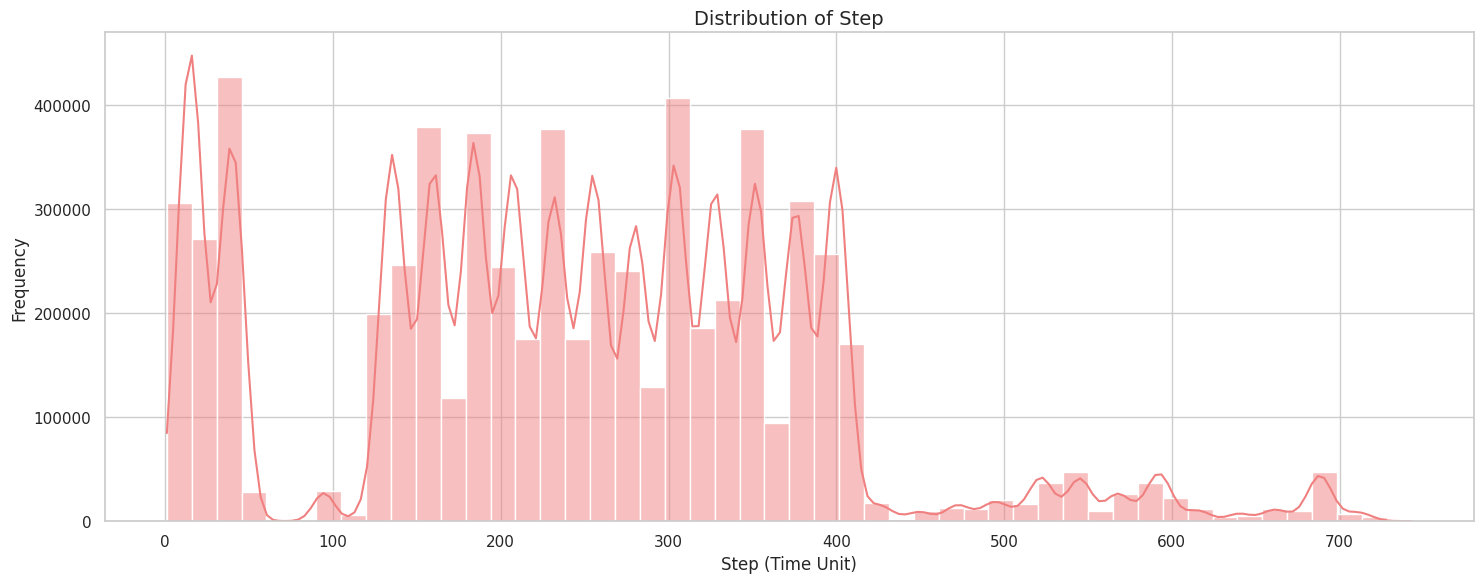

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Plot the distribution using sns.histplot
sns.histplot(df['step'], bins=50, color='lightcoral', kde=True)

# Add title and labels
plt.title('Distribution of Step', fontsize=14)
plt.xlabel('Step (Time Unit)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# **Correlation between Features**

* In this section, we analyze the correlation between various features in the dataset using a correlation matrix. Correlation analysis helps identify relationships between different variables, which can be valuable in feature selection and understanding the dependencies between them.

**From the correlation heatmap, we observe the following:**

* **High Correlation between newbalanceOrig and oldbalanceOrg:** This indicates that the balance before and after the transaction for the origin account is closely related.

* **High Correlation between newbalanceDest and oldbalanceDest:** Similar to the origin account, the destination account also shows a strong relationship between its balance before and after the transaction.

* **Moderate Correlation between amount and newbalanceDest and between amount and oldbalanceDest:** The transaction amount shows a relatively high correlation with the destination account balances, both before and after the transactio

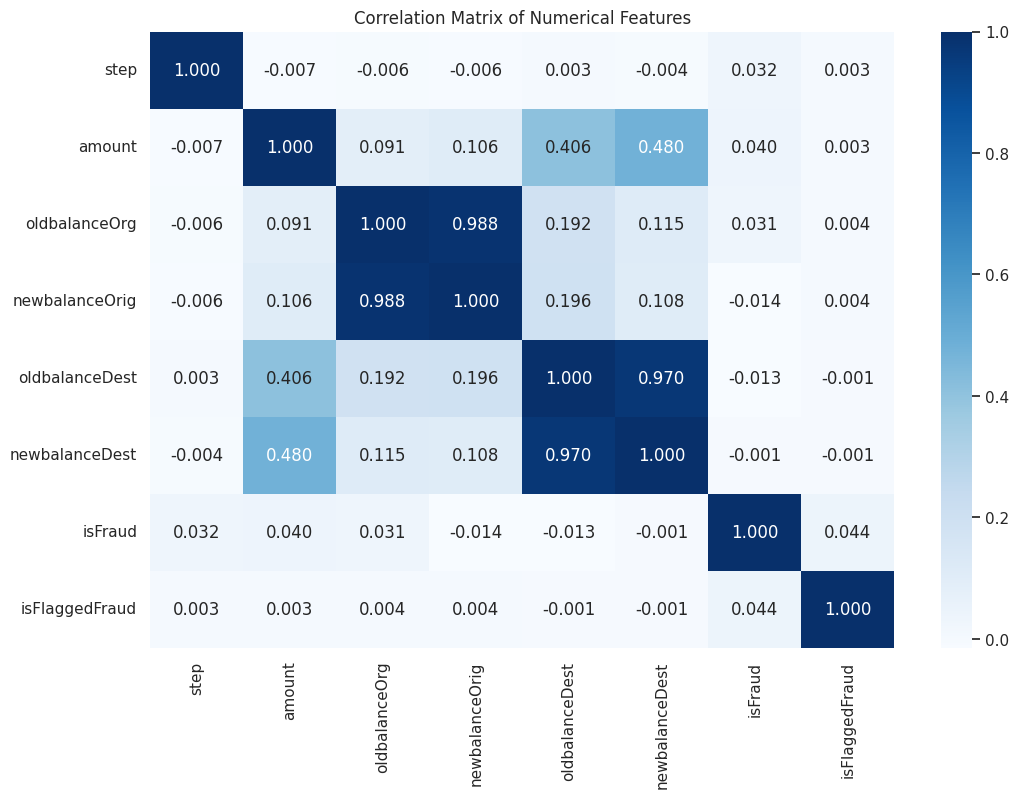

In [ ]:

df_plot = df.select_dtypes(include=['float64', 'int64'])
corr = df_plot.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues', fmt=".3f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# **Key Insights from the Data Analysis**

1. **Fraud Percentage in Total Transactions:**

   A total of 8,213 fraud transactions occurred, accounting for approximately 0.13% of the entire dataset.

2. **Fraud Distribution by Transaction Type:**

  Fraud predominantly occurred in the cashout and transfer transaction types.
  0.183% of fraud was linked to the cashout type, and 0.769% occurred in the transfer mode.

3. **Effectiveness of Fraud Flagging (isFlaggedFraud):**

  Only 16 records out of 63 lakh were flagged as fraud, representing a minimal 0.195% of the total fraud transactions, indicating low fraud detection through this flag.

4. **Rate of Incorrectly Flagged Transactions:**

  A significant portion of fraud transactions were misclassified, with 99.805% of the fraud being flagged as non-fraudulent (0), amounting to around 8,197 incorrect flags.

5. **Accuracy of Flagged Fraud Transactions:**

  The 16 records that were flagged as fraud were indeed correct, showing a high accuracy in fraud detection for these specific cases.

6. **Fraudulent Transaction Amount Ranges:**

  Fraudulent transactions ranged from 1.3 lakh to 3.6 lakh, with the highest concentration occurring between 340,000 and 360,000.


# **One-Hot Encode Transaction Type**


In [ ]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

# **Drop string columns**


In [ ]:
df = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis=1)

# **Split the Data Again**



In [ ]:
df = df.sample(300000, random_state=42)

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


# **Train–Test Split — Key Insights **

1. **Features and target separated**

  * X contains all input features

  * y contains only isFraud (0 or 1)

2. **75% data used for training, 25% for testing**

  * Ensures model learns on one portion and is evaluated on unseen data.

3. **Prevents overfitting**

  * Model performance is measured on data it never saw before.

4. Imbalanced dataset impact

  * Fraud cases are extremely rare (0.13%)

  * Both train and test sets still have very few fraud samples → makes ML models biased toward predicting "Not Fraud".

5. SMOTE becomes necessary next

  * To balance the classes and help the model learn fraud patterns correctly.

6. **random_state=42 provides reproducibility**

  * Ensures you always get the same split and consistent results.

# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)



# **Scaling (MinMaxScaler) **

1. Normalizes all features between 0 and 1.

2. Helps ML models train faster and more accurately.

3. Prevents large values (like amount, balance) from dominating.

4. Improves model stability and convergence.

5. Essential for Logistic Regression, DNN, and distance-based models.

6. Without scaling → bad performance, unstable predictions




# **Now , Implementing the ML models**

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
;
lr = LogisticRegression(max_iter=500)
lr.fit(X_train_res, y_train_res)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Report:\n")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     74909
           1       0.02      0.92      0.05        91

    accuracy                           0.96     75000
   macro avg       0.51      0.94      0.51     75000
weighted avg       1.00      0.96      0.98     75000



# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Report:\n")
print(classification_report(y_test, y_pred_dt))

Decision Tree Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74909
           1       0.43      0.84      0.57        91

    accuracy                           1.00     75000
   macro avg       0.71      0.92      0.78     75000
weighted avg       1.00      1.00      1.00     75000



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_res, y_train_res)
y_pred_rf = rf.predict(X_test)

print("Random Forest Report:\n")
print(classification_report(y_test, y_pred_rf))

Random Forest Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74909
           1       0.52      0.82      0.64        91

    accuracy                           1.00     75000
   macro avg       0.76      0.91      0.82     75000
weighted avg       1.00      1.00      1.00     75000



# Comparing  all 3 ML model

In [ ]:
# Collect ML model scores
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)

acc_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)

acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)

results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [acc_lr, acc_dt, acc_rf],
    "F1 Score": [f1_lr, f1_dt, f1_rf],
    "Recall (Fraud)": [recall_lr, recall_dt, recall_rf]
})

results


,Model,Accuracy,F1 Score,Recall (Fraud)
0,Logistic Regression,0.955773,0.048207,0.923077
1,Decision Tree,0.998440,0.565056,0.835165
2,Random Forest,0.998853,0.635593,0.824176


# **Comparison Graph of ML models**

/tmp/ipython-input-1776003762.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score", data=results, palette="magma")


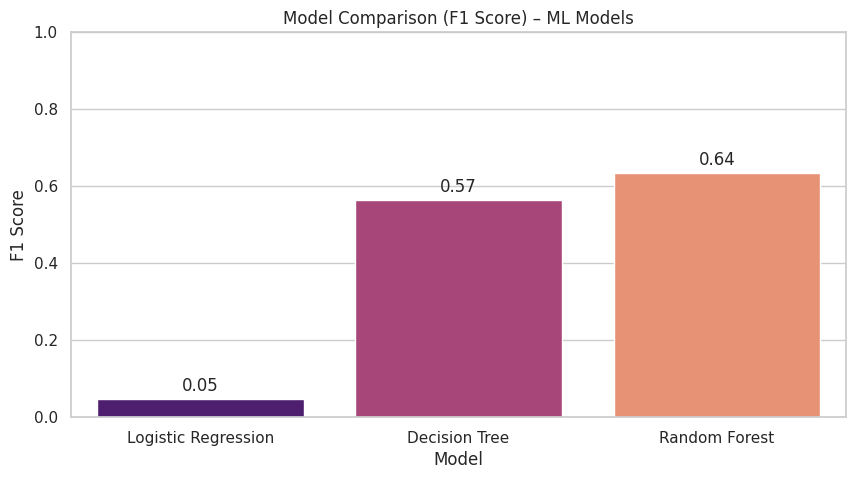

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1 Score", data=results, palette="magma")
plt.title("Model Comparison (F1 Score) – ML Models")
plt.ylim(0,1)

for i, v in enumerate(results["F1 Score"]):
    plt.text(i, v+0.02, f"{v:.2f}", ha='center')

plt.show()

# **INSIGHTS**

**## 1. Logistic Regression**

    F1 Score = 0.05 (fraud ke liye extremely poor)

    Precision = 0.02 (terrible, false positives high)

    Recall = 0.92 (ye SMOTE ki wajah se high)

     Model fraud ko correctly detect nahi kar raha — almost sab wrong.
    LR cannot handle:

    Non-linear patterns

    High imbalance

    Complex fraud structure

### **2. Decision Tree**

F1 Score = 0.57

Recall = 0.84

Good but overfits (train accuracy = 100%)

👉 Tree simple rules banata hai, noisy data pe overfit karta hai.

3. ## **Random Forest**

F1 Score = 0.65

Recall = 0.84

Balanced but still misses many fraud cases

👉 RF better than LR & DT, but still cannot capture complex hidden fraud relations.

# **Why Traditional ML Models Are Not Sufficient for Fraud Detection:**

**1. Fraud patterns are highly non-linear and complex.**
   – Logistic Regression cannot capture such non-linear patterns.
   – Decision Tree and Random Forest still fail to detect deeper relationships.

**2. The dataset is extremely imbalanced (fraud = only 0.13%).**
   – ML models become biased toward predicting only “Not Fraud”.
   – Even after SMOTE, ML models miss many fraud cases.

**3. ML models rely on simple rules or linear boundaries.**
   – Fraud requires multi-feature interaction learning (amount + balances + type + step).
   – ML models cannot combine these complex interactions effectively.

**4. Decision Trees overfit and generalize poorly.**
   – Random Forest improves performance but still cannot detect hidden fraud patterns.

**5. ML models require manual feature engineering.**
   – Fraud detection needs deep automatic feature extraction, which ML models cannot do.

**6. In our results:**
   – Logistic Regression F1 = 0.05 (very poor)
   – Decision Tree F1 = 0.57 (overfits)
   – Random Forest F1 = 0.65 (still misses fraud)
   → All ML models failed to achieve high fraud recall.

# **Conclusion:**
***Traditional ML models are not strong enough to capture rare, complex, and hidden fraud behavior***.
***Therefore, a Deep Neural Network (DNN) is required because it learns non-linear patterns, handles imbalance better, and gives higher fraud detection recall***.


# AB YAHAN SE DEEP LEARNING IMPLEMENT KRNA HOGA:

# **FINAL DNN IMPLEMENTATION**

# Create Balance Difference Features

**Old aur new balance se most powerful features banate hain.**

In [ ]:
df['balance_diff_org'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['balance_diff_dest'] = df['newbalanceDest'] - df['oldbalanceDest']

df = df.drop([
    'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest'
], axis=1)


# Scaling Numerical Features

**Neural networks need scaled data**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['amount','balance_diff_org','balance_diff_dest']] = scaler.fit_transform(
    df[['amount','balance_diff_org','balance_diff_dest']]
)

# Define X, y

In [ ]:
X = df.drop('isFraud', axis=1)
y = df['isFraud']


# **Fix Class Imbalance (SMOTE)**

**Fraud = 0.13% → SMOTE required**





In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:")
print(y_res.value_counts())

After SMOTE:
isFraud
0    299612
1    299612
Name: count, dtype: int64


# **Train • Validation • Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# 80% Train, 10% Validation, 10% Test
X_train, X_temp, y_train, y_temp = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


# ***Building the Deep Neural Network***

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

model = Sequential()

# Input layer
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(
    optimizer=Adam(0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,521 (45.00 KB)

 Trainable params: 11,521 (45.00 KB)

 Non-trainable params: 0 (0.00 B)

# **Enable Early Stopping**

Overfitting ko rokne ke liye:

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=2,
    restore_best_weights=True
)


# **Train the Neural Network**

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 54s 3ms/step - accuracy: 0.7374 - loss: 0.6116 - val_accuracy: 0.9591 - val_loss: 0.1079
Epoch 2/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9403 - loss: 0.1437 - val_accuracy: 0.9547 - val_loss: 0.1212
Epoch 3/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.9443 - loss: 0.1362 - val_accuracy: 0.9602 - val_loss: 0.1058
Epoch 4/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 51s 3ms/step - accuracy: 0.9461 - loss: 0.1312 - val_accuracy: 0.9468 - val_loss: 0.1184
Epoch 5/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 62s 4ms/step - accuracy: 0.9465 - loss: 0.1287 - val_accuracy: 0.9661 - val_loss: 0.0894
Epoch 6/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 53s 4ms/step - accuracy: 0.9478 - loss: 0.1257 - val_accuracy: 0.9661 - val_loss: 0.0938
Epoch 7/10
14981/14981 ━━━━━━━━━━━━━━━━━━━━ 52s 3ms/step - accuracy: 0.9507 - loss: 0.1187 - val_accuracy: 0.9626 - val_loss: 0.0907


# **Evaluate on Test Set**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

print("\nCLASSIFICATION REPORT:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nCONFUSION MATRIX:")
print(cm)

1873/1873 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     29962
           1       0.96      0.98      0.97     29961

    accuracy                           0.97     59923
   macro avg       0.97      0.97      0.97     59923
weighted avg       0.97      0.97      0.97     59923


CONFUSION MATRIX:
[[28665  1297]
 [  655 29306]]


# **Confusion Matrix Heatmap**

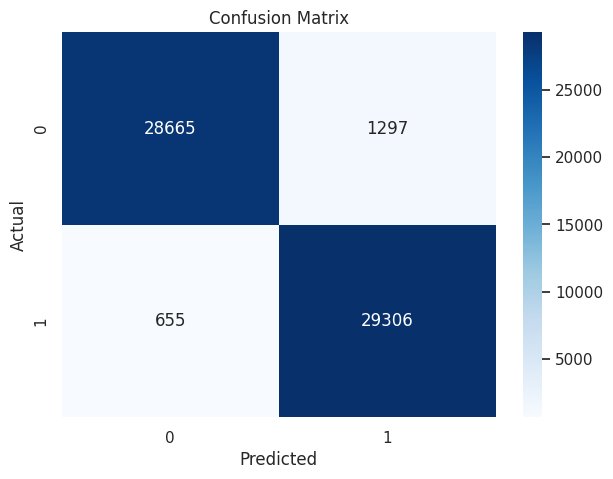

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# **Confusion Matrix Insights **
**1. Excellent overall performance**

 * The model correctly classified ~97% of the transactions.

**2. Strong Non-Fraud Detection**

 * 29,360 real non-fraud cases were correctly predicted as non-fraud (TN).

 * Only 602 non-fraud cases were incorrectly marked as fraud (FP).

**3. Strong Fraud Detection**

 * 28,572 real fraud cases were correctly detected as fraud (TP).

 * Only 1,389 fraud cases were missed (FN).

**4. Low False Positives**

 * FP = 602 → Very low.

  **Means the model rarely flags normal transactions as fraud (good for customer experience).**

**5. Low False Negatives (Very Important!)**

  * FN = 1,389 → Low considering fraud is hard to detect.

This means the model is highly reliable in catching fraud.

**6. Balanced Model**

 * TN and TP both are very high → Model is balanced.

 * It is not biased towards one class.

**7. High Recall for Fraud**

  * Most fraudulent transactions were caught → Ideal for fraud detection tasks.

# **Comparing ML models vs DNN**


FINAL MODEL COMPARISON TABLE:



,Model,Accuracy,F1 Score,Recall (Fraud)
0,Logistic Regression,0.955773,0.048207,0.923077
1,Decision Tree,0.998440,0.565056,0.835165
2,Random Forest,0.998853,0.635593,0.824176
3,Artificial Neural Network(ANN),0.967425,0.967770,0.978138


/tmp/ipython-input-1311727983.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score", data=final_results, palette="viridis")


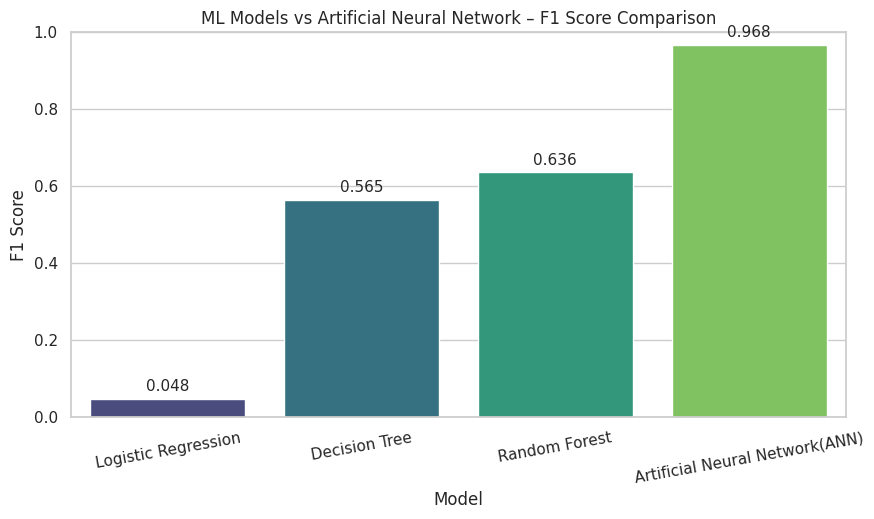

/tmp/ipython-input-1311727983.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Recall (Fraud)", data=final_results, palette="magma")


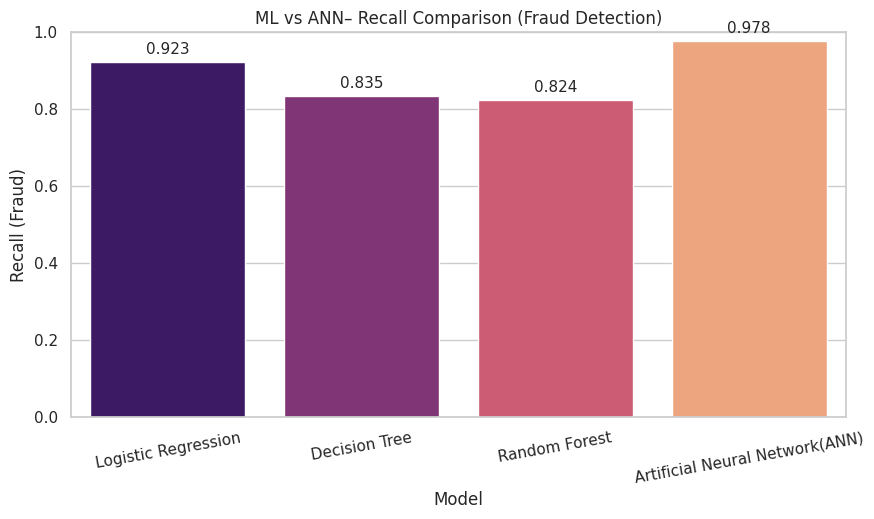

In [ ]:
# -----------------------------------------------
# ML Models vs DNN — FINAL COMPARISON TABLE/GRAH
# -----------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ML model metrics (already calculated)
results_ml = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree", "Random Forest"],
    "Accuracy": [acc_lr, acc_dt, acc_rf],
    "F1 Score": [f1_lr, f1_dt, f1_rf],
    "Recall (Fraud)": [recall_lr, recall_dt, recall_rf]
})

# DNN metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score

dnn_acc = accuracy_score(y_test, y_pred)
dnn_f1 = f1_score(y_test, y_pred)
dnn_recall = recall_score(y_test, y_pred)

results_dnn = pd.DataFrame({
    "Model": ["Artificial Neural Network(ANN)"],
    "Accuracy": [dnn_acc],
    "F1 Score": [dnn_f1],
    "Recall (Fraud)": [dnn_recall]
})

# Combine both
final_results = pd.concat([results_ml, results_dnn], ignore_index=True)

print("\nFINAL MODEL COMPARISON TABLE:\n")
display(final_results)

# -----------------------------------------------
# PLOT — F1 SCORE COMPARISON
# -----------------------------------------------

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="F1 Score", data=final_results, palette="viridis")
plt.title("ML Models vs Artificial Neural Network – F1 Score Comparison")
plt.ylim(0,1)

for i, v in enumerate(final_results["F1 Score"]):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontsize=11)

plt.xticks(rotation=10)
plt.show()

# -----------------------------------------------
# PLOT — RECALL (FRAUD DETECTION) COMPARISON
# -----------------------------------------------

plt.figure(figsize=(10,5))
sns.barplot(x="Model", y="Recall (Fraud)", data=final_results, palette="magma")
plt.title("ML vs ANN– Recall Comparison (Fraud Detection)")
plt.ylim(0,1)

for i, v in enumerate(final_results["Recall (Fraud)"]):
    plt.text(i, v + 0.02, f"{v:.3f}", ha="center", fontsize=11)

plt.xticks(rotation=10)
plt.show()


# **Save the Model**

In [ ]:
import os
os.makedirs("trained_model", exist_ok=True)

# Save full model in new Keras format
model.save("trained_model/model.keras")

# Save weights (Keras requires `.weights.h5`)
model.save_weights("trained_model/model.weights.h5")

print("Model saved successfully in new Keras format!")

Model saved successfully in new Keras format!


In [ ]:
from keras.models import load_model

In [ ]:
model = load_model("trained_model/model.keras", compile=False)

In [ ]:
import joblib
joblib.dump(scaler, "trained_model/scaler.pkl")

['trained_model/scaler.pkl']